In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import model as LR

In [2]:
df = pd.read_csv("data.csv")
df.head()

,SNo,X_1,X_2,label
0,0,-0.869144,0.389310,0
1,1,-0.993467,-0.610591,0
2,2,-0.834064,0.239236,0
3,3,-0.136471,0.632003,1
4,4,0.403887,0.310784,1


In [3]:
df.drop(columns='SNo', axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     100 non-null    float64
 1   X_2     100 non-null    float64
 2   label   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


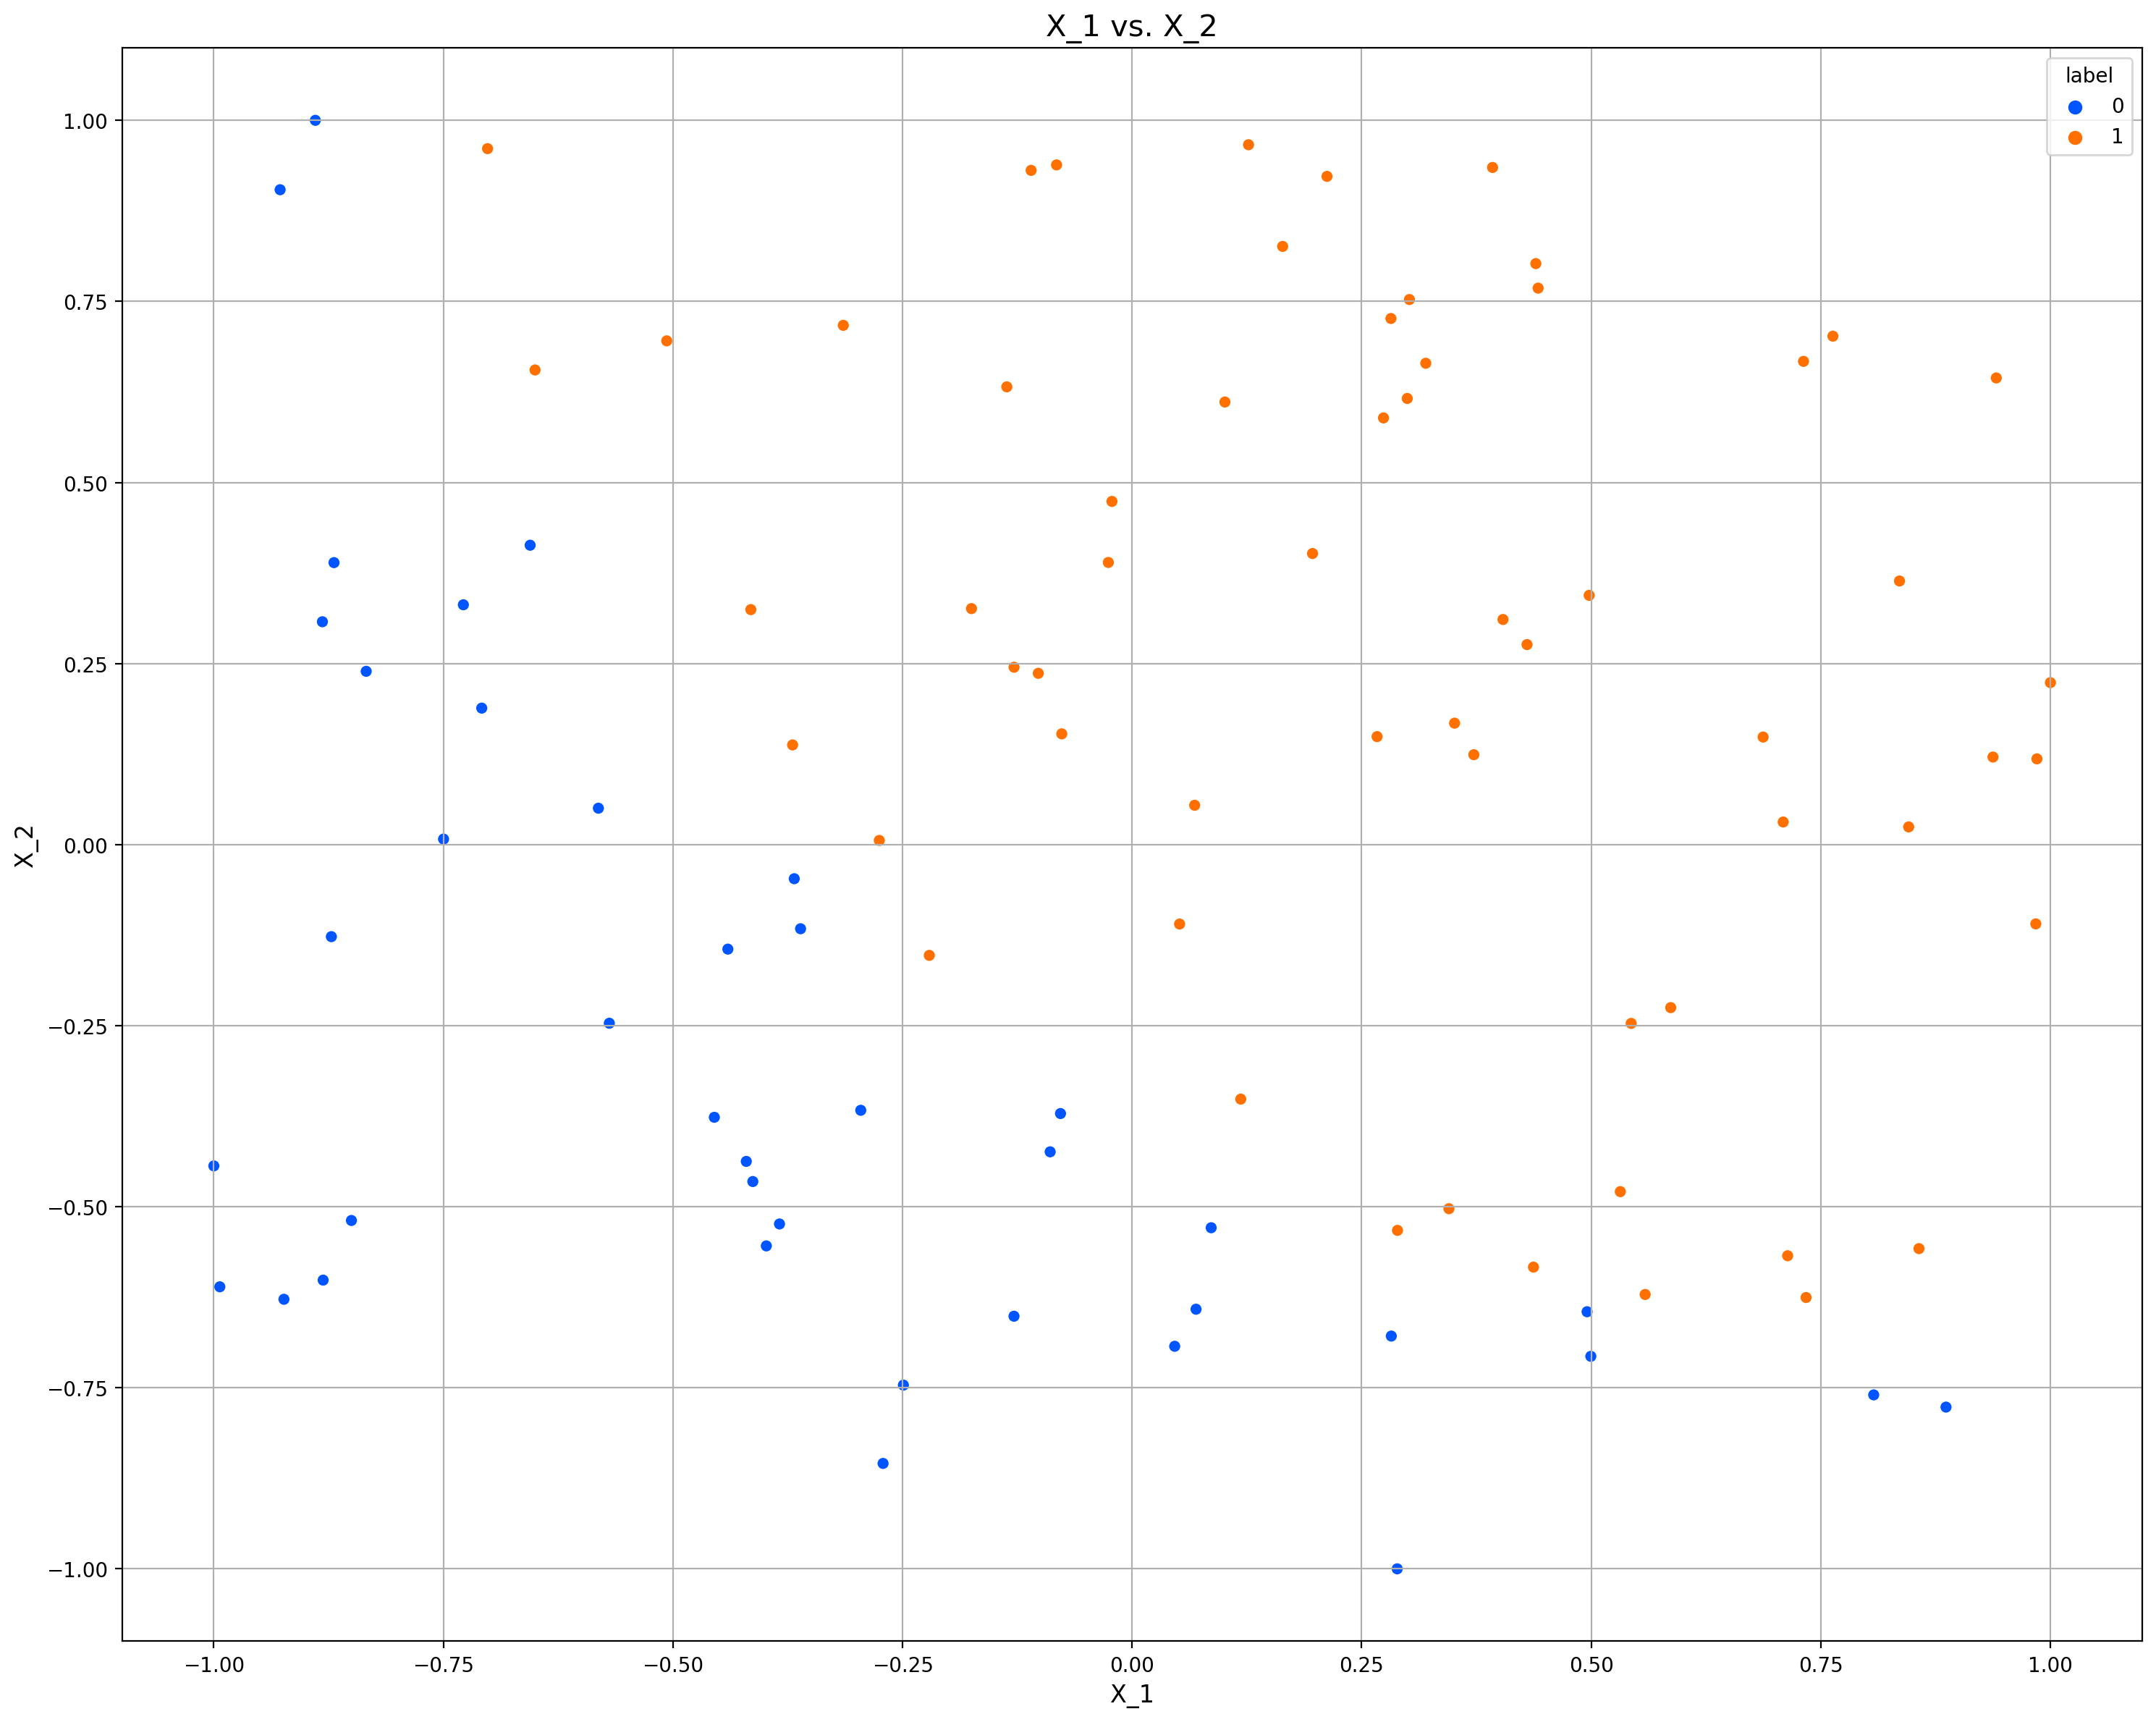

In [4]:
# Plot
colors = ['#0055ff','#ff7000']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=1 ,ncols=1, figsize=(15,12), dpi=200)

sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=df.columns[2], ax=ax)
ax.set_title('{} vs. {}'.format(df.columns[0], df.columns[1]), size = 15)
ax.set_xlabel(df.columns[0], size = 12)
ax.set_ylabel(df.columns[1], size = 12)
ax.grid()

plt.tight_layout()
plt.show()

In [5]:
df.isnull().sum()

X_1      0
X_2      0
label    0
dtype: int64

In [6]:
# Splitting the DataFrame into training and testing sets with a 70-30 split ratio
# and specifying a random seed for reproducibility
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split the data again to simplify the problem with curr practice
x_train = train.iloc[:, :-1] # All columns except the last one
y_train = train.iloc[:, -1]  # The last column

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70, 2)
(70,)
(30, 2)
(30,)


In [7]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [8]:
# Create and train the logistic regression model built-self
model = LR.LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

y_pred

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.])

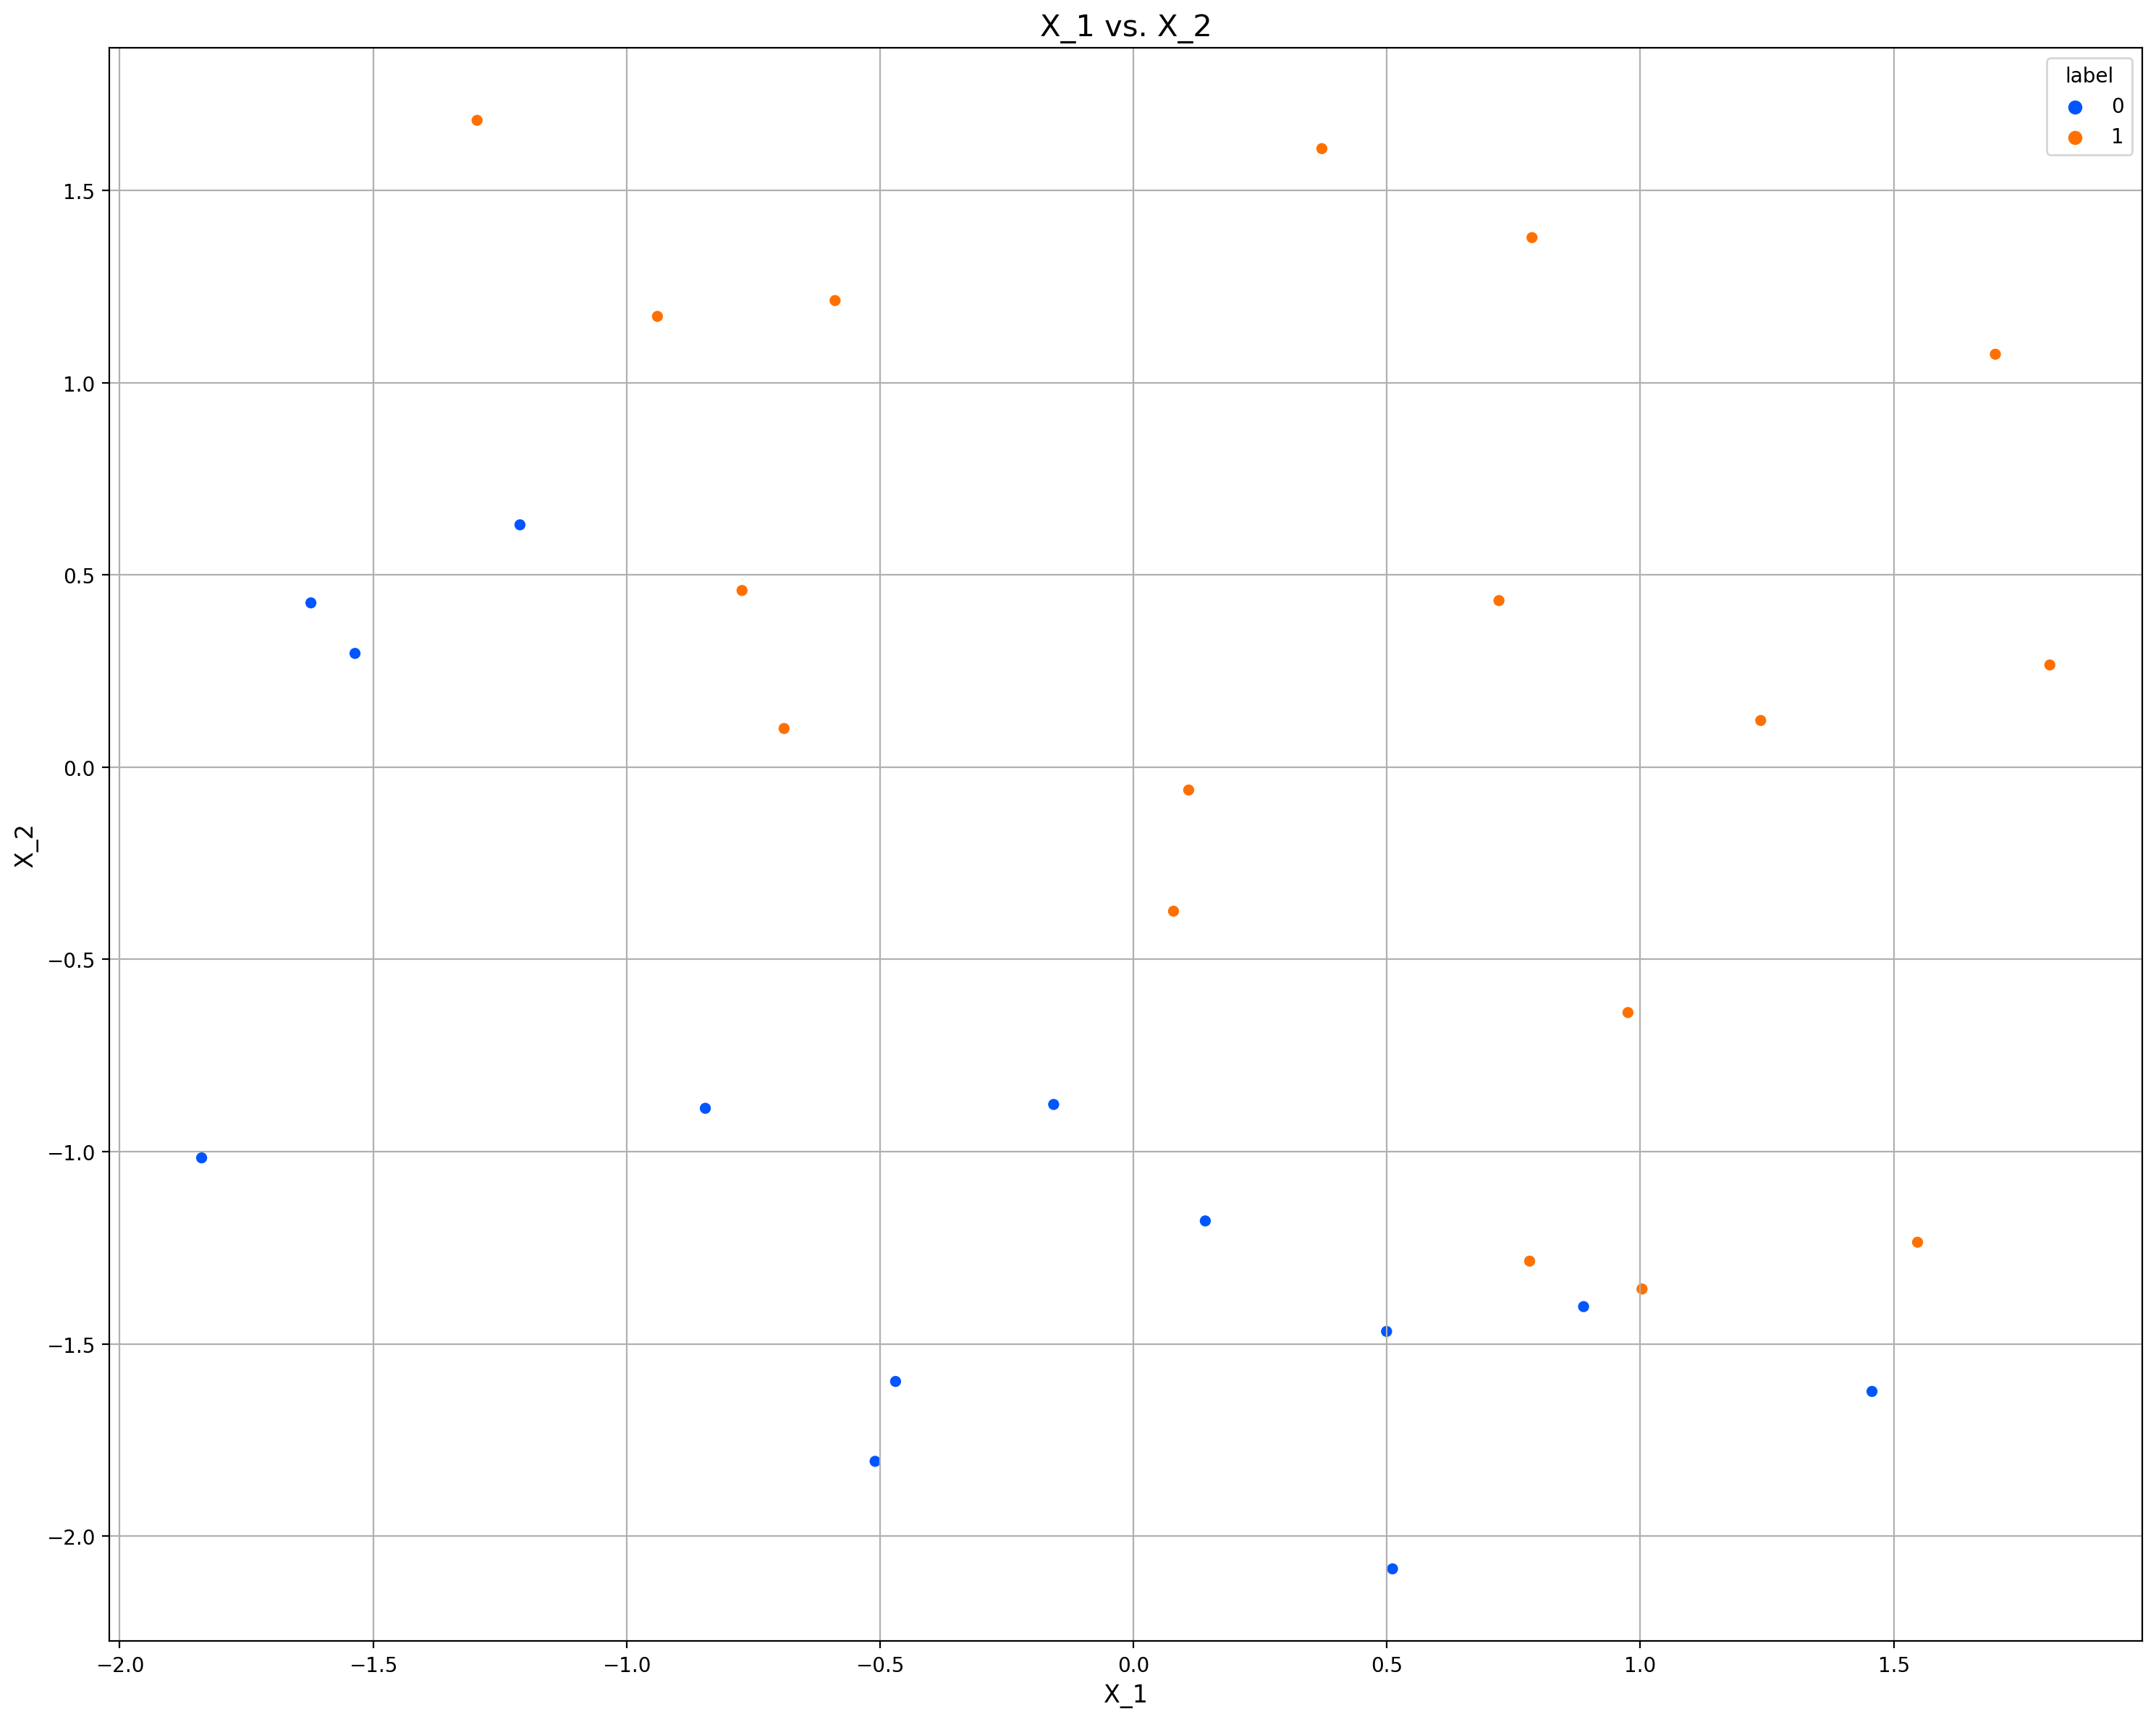

In [28]:
# Plot
colors = ['#0055ff', '#ff7000']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=1 ,ncols=1, figsize=(15,12), dpi=200)

sns.scatterplot(data=x_test, x=x_test[:, 0], y=x_test[:, 1], hue=y_test, ax=ax)
ax.set_title('{} vs. {}'.format(df.columns[0], df.columns[1]), size = 15)
ax.set_xlabel(df.columns[0], size = 12)
ax.set_ylabel(df.columns[1], size = 12)
ax.grid()

plt.tight_layout()
plt.show()

In [30]:
np.sum(abs(y_test - y_pred))

4.0